In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as op
import uncertainties.unumpy as unp
from uncertainties import ufloat
import scipy.constants as const
from uncertainties.unumpy import nominal_values as noms
from uncertainties.unumpy import std_devs as stds
import pandas as pd

## Spektrometermessung mit- und ohne Raumlicht

In [3]:
lam_on, DC_on, C_on = np.genfromtxt("content/data/licht_an.txt", unpack = True)
lam_off, DC_off, C_off = np.genfromtxt("content/data/licht_aus.txt", unpack = True)

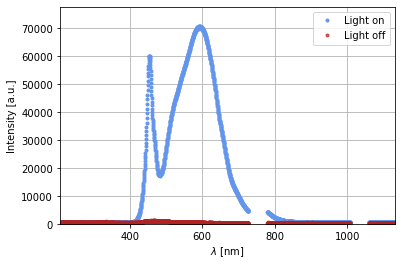

In [24]:
plt.plot(lam_on, C_on, marker = ".", c = "cornflowerblue", label = "Light on", lw = 0)
plt.plot(lam_off, C_off, marker = ".", c = "firebrick", label = "Light off", lw = 0, alpha = .7)
plt.legend();
plt.xlim(min(lam_on), max(lam_on))
plt.ylim(0, 1.1*max(C_on))
plt.ylabel("Intensity [a.u.]")
plt.grid()
plt.xlabel(r"$\lambda$ [nm]");

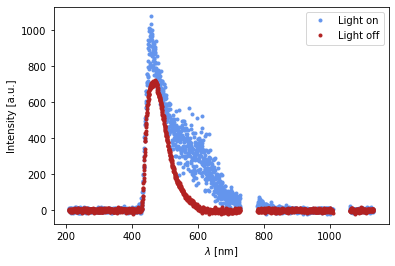

In [23]:
plt.plot(lam_on, C_on - DC_on, marker = ".", c = "cornflowerblue", label = "Light on", lw = 0)
plt.plot(lam_off, C_off - DC_off, marker = ".", c = "firebrick", label = "Light off", lw = 0)
plt.legend();
plt.xlim(min(lam_on), max(lam_on))
plt.ylim(0, 1.1*max(C_on - DC_on))
plt.ylabel("Intensity [a.u.]")
plt.xlabel(r"$\lambda$ [nm]");

$\Rightarrow$ Licht besser ausschalten

## Radialsymmetrie

In [6]:
import itertools

# read all files and store in dataframe

Hs = range(-18, 30, 4)
Vs = range(-6, 34, 4)

data = []

for h, v in itertools.product(Hs, Vs):
    lam, C = np.genfromtxt(f"content/data/radial_2_trohabe/Attenuation_h={h}deg_v={v}deg_x=0mm.txt", unpack = True)
    lam_dc, DC = np.genfromtxt(f"content/data/radial_2_trohabe/DarkCounts_h={h}deg_v={v}deg.txt", unpack = True)
    intensity = np.mean(C-DC) # take mean counts over all lambdas as measure for intensity
    data.append(np.array([h, v, intensity])) 
data = np.array(data)

Text(0.5, 1.0, '2D Intensity Distribution of Light Source')

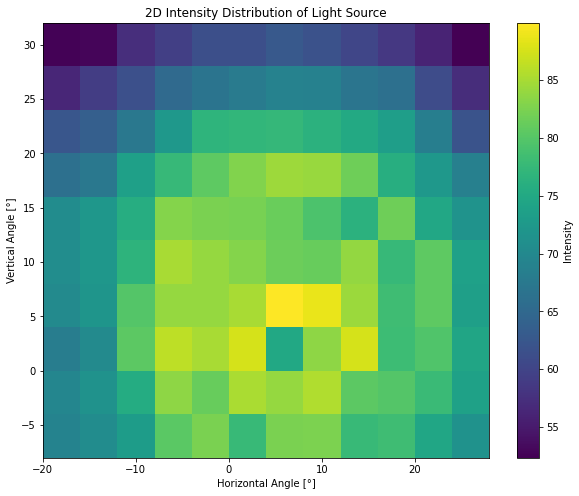

In [7]:
# chat gpt solution
H, V = np.meshgrid(Hs, Vs, indexing='ij')

# Initialize an array for the histogram
histogram = np.zeros(H.shape)

# Populate the histogram array
for i, (h, v, intensity) in enumerate(data):
    hi = np.where(Hs == h)
    vi = np.where(Vs == v)
    histogram[hi, vi] = intensity

# Plot the histogram
plt.figure(figsize=(10, 8))
plt.pcolormesh(H, V, histogram, cmap='viridis')
plt.colorbar(label='Intensity')
plt.xlabel('Horizontal Angle [°]')
plt.ylabel('Vertical Angle [°]')
plt.title('2D Intensity Distribution of Light Source')
#plt.show()

Text(0.5, 1.0, '2D Intensity Distribution of Light Source')

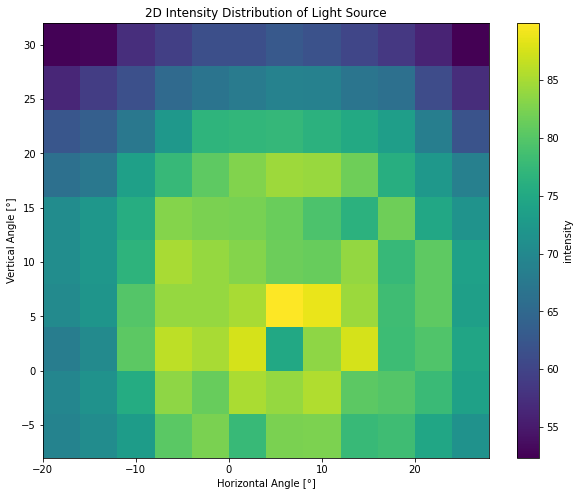

In [8]:

plt.figure(figsize=(10, 8))
plt.hist2d(data[:,0], data[:,1], weights = data[:,2], bins = [np.array(range(-20, 32, 4)), np.array(range(-8, 36, 4))]);
plt.colorbar(label = "intensity");
plt.xlabel('Horizontal Angle [°]')
plt.ylabel('Vertical Angle [°]')
plt.title('2D Intensity Distribution of Light Source')

## Intensitätsmessung

In [9]:
Hs = range(0, 40, 4)
Xs = range(0, 2000, 100)

data = []

for h, x in itertools.product(Hs, Xs):
    lam, C = np.genfromtxt(f"content/data/intensity_2_trohabe/Attenuation_h={h}deg_v=0deg_x={x}mm.txt", unpack = True)
    lam_dc, DC = np.genfromtxt(f"content/data/intensity_2_trohabe/DarkCounts_h={h}deg_v=0deg.txt", unpack = True)
    intensity = np.mean(C-DC) # take mean counts over all lambdas as measure for intensity
    data.append(np.array([h, x, intensity])) 
data = np.array(data)
#data[data[:, 1] > 500 ,2] = data[data[:,1] > 500][:,2] * 2.5 # manipulation of data hehe (the fiber was bent at x = 500)

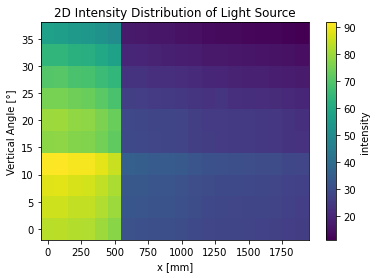

In [10]:
plt.hist2d(data[:,1], data[:,0], weights = data[:,2], bins = [np.array(range(-50, 2000, 100)), np.array(range(-2, 40, 4))]);
plt.colorbar(label = "intensity");
plt.xlabel('x [mm]')
plt.ylabel('Vertical Angle [°]')
plt.title('2D Intensity Distribution of Light Source');

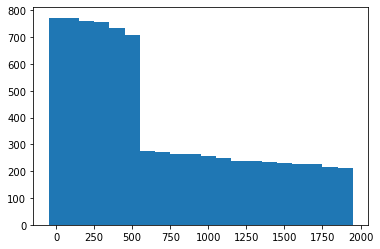

In [11]:
plt.hist(data[:,1], weights = data[:,2], bins = np.array(range(-50, 2000, 100)));

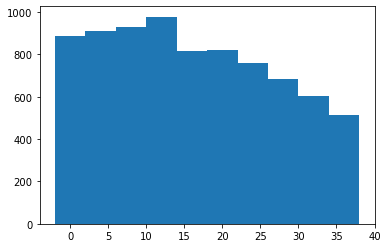

In [12]:
plt.hist(data[:,0], weights = data[:,2], bins = np.array(range(-2, 40, 4)));

## Winkel Intensiätsmessung

In [13]:
data = []

for h in range(0, 45):
    lam, C = np.genfromtxt(f"content/data/small_angle_trohabe/Attenuation_h={h}deg_v=0deg_x=0mm.txt", unpack = True)
    lam_dc, DC = np.genfromtxt(f"content/data/small_angle_trohabe/DarkCounts_h={h}deg_v=0deg.txt", unpack = True)
    intensity = np.mean(C-DC) # take mean counts over all lambdas as measure for intensity
    data.append(np.array([h, intensity])) 
data = np.array(data)

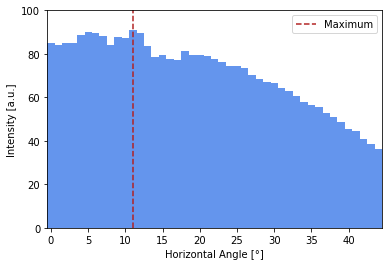

In [14]:
plt.hist(data[:,0], weights = data[:,1], bins = np.linspace(-0.5, 44.5, 46), color = "cornflowerblue");
plt.ylabel("Intensity [a.u.]")
plt.xlabel("Horizontal Angle [°]");
plt.vlines(data[data[:,1] ==max(data[:,1])][0,0], 0, 100, ls = "dashed", color = "firebrick", label = "Maximum")
plt.ylim(0,100);
plt.xlim(-0.5,44.5);
plt.legend();